# **Machine learning for classification**

Here, logistic regression is implemented to predict churn.

## **Churn prediction project**

- Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## **Data Preparation**

- Data is downloaded,
- read with pandas,
- look at the data to understand variables and values.
- check if column names and values are uniform, if not, make corrections.
- check if all columns are read correctly.
- check if the churn variable needs any preparations.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# we can take a look at all the column names by just transposing the roles and columns for the first 5 features.
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
#sometimes there's not uniformity among the column names, so we correct the names to lowercase

df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
# for senior citizen, 0 and 1 is used to represent yes, and no; this gives it an int dtype.
#you see that for some reason, total objects is of datatype object. that is wrong, and so we convert it to a number.

# pd.to_numeric(df.totalcharges), this gives - ValueError: Unable to parse string "_" , hence we parse for error

tc = pd.to_numeric(df.totalcharges, errors = "coerce") #-this effects correction and assigns to a new variable tc


In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = "coerce") #this acts directly on the dataframe/totalcharges column to effect corrections.

In [10]:
df.totalcharges = df.totalcharges.fillna(0)

In [11]:
df[tc.isnull()][["customerid", "totalcharges"]]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [12]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [13]:
df.churn = (df.churn == 'yes').astype(int)

In [14]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## **Setting up the validation framework**

Here, the train/validation/test split is done using scikit-learn

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

#Nb, fulltrain - train combined with val. datasets.

In [17]:
len(df_full_train), len(df_test)

(5634, 1409)

In [18]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) 

#25% is the proportion of the val segment, that is 20 out of the full_train 80.

In [19]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_tes = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [22]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

We delete it because we don't want to use the churn variable in training the dataset, i.e., building the model.

*But, in this case you also notice we didnt del the churn variable from the full_train dataset, ie df_full_train. This is because, we wish to use it for the EDA, exploratory data analysis, such as in checking  for missing values, and other variables.

## **Exploratory data analysis - EDA**

In [23]:
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [25]:
# we check the churn rate, by using normalise, ie 0.269968
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [26]:
# This is the same as computing the mean; actually, the ideal method for getting the churn rate.
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

#### Next, we consider the numerical variables and categorical variables.

In [27]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [28]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [29]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [30]:
df_full_train[categorical].nunique()

# nunique shows the number of subcategories in the categorical variable, e.g Gender - m or f, = 2.

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## **Feature Importance:** 

Feature importance analysis(part of EDA), - identifies which features affect our target variable.

- churn rate
- risk ratio
- mutual information.
- Correlation (usually for numerical columns)

#### **Churn rate**

we check for churn rate within features, that is checking within the groups/columns of observations.

In [31]:
churn_female = df_full_train[df_full_train.gender == "female"].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [32]:
churn_male = df_full_train[df_full_train.gender == "male"].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [33]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [34]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [35]:
churn_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [36]:
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [37]:
global_churn - churn_partner 
# This is greater than the difference between global churn and churn_no_partner gender.

np.float64(0.06493474245795922)

In [38]:
global_churn - churn_no_partner 

np.float64(-0.05984095297455855)

**1. When Global - Group is less than 0, customers are more likely to churn; and vice versa, global - group more than 0, customers are less likely to churn**

#### **Risk Ratio**

**2. When Group/Global is greater than 1, customers are more likely to churn, and viceversa.** 

In [39]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

    SELECT 
        gender,
        AVG(churn),
        AVG(churn) - global_churn AS  diff,
        AVG(churn)/global_churn AS  diff,
    FROM
        data
    GROUP BY
        gender;

In [40]:
#here we wish to return a dataframe and the difference and risk ratio altogether in condensed coding.

df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean']/global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


#### We now wish to check for each column category, ie -

In [41]:
from IPython.display import display

In [42]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean']/global_churn
    display(df_group)
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


#### **Mutual information**

**Feature importance - Mutual information**

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another.

- https://en.wikipedia.org/wiki/Mutual_information 

In [43]:
from sklearn.metrics import mutual_info_score

In [44]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [45]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [46]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [47]:
#checking through the categorical variables

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [48]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

#### **Feature importance: Correlation**

How about for numerical variables?

    
correlation coefficient **r**, -1 <= r >= 1

0.0 -0.2 (Low positive), 0.2 - 0.5(moderate positive), 0.5-1.00(strong positive)

Negative, e.g more tenure, less churn. Positive, higher tenure, higher churn. Zero, tenure has no effect on churn

- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In this case,

    y takes (O or 1), ie yE{0,1}
    X takes any real number R , ie X from {- infinity to  + infinity}

In [49]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

## **One hot encoding**


A way of encoding categorical variables.
- Use Scikit learn to encode the categorical features.

In [50]:
from sklearn.feature_extraction import DictVectorizer

In [51]:
df_train[['gender', 'contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [52]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [53]:
dv = DictVectorizer(sparse=False)

In [54]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [55]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [56]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [57]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [58]:
dv = DictVectorizer(sparse = False)

In [59]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

# A shorter way of writing the above, Xtrain = dv.fit_transform(train_dicts)

In [60]:
X_train.shape

(4225, 45)

In [61]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [62]:
dv.transform(train_dicts[:5])[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])

**Doing same for the validation data set**

In [63]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [64]:
X_val = dv.transform(val_dicts)

when we apply the fit method, this method is looking at the content of the df_train dictionaries we are passing to the DictVectorizer instance, and fit is figuring out(training) how to map the values of these dictionaries. If categorical, applies one-encoding, if numerical it will leave it as it is.

with this context, if we apply the fit to the validation model, we are "giving the answers" and we are not letting the fit" do its job for data that we haven't seen. By not applying the fit to the validation model, we can know how well it was trained.

**So, there is no need to initialise another instance of dictVectorzer after fitting it on the train set as it will overwrite what it learnt from being fit on the train data. The correct way is to fit_transform the train set, and only transform the validation and test sets.**

## **Logistic Regression**

- Binary Classification
- Linear vs Logistic regression


In [65]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [66]:
z = np.linspace(-7,7,51)

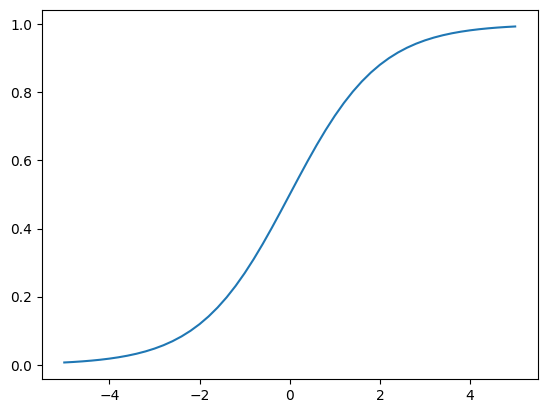

In [67]:
plt.plot(z, sigmoid(z))

In [68]:
def linear_regression(Xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result    

In [69]:
def logistic_regression(Xi):
    sccore = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]
    result = sigmoid(score)
    return result    

#### **Training logistic regression with scikit_learn**

- Train a model with scikit-learn
- Apply it to the validation dataset
- Calculate the accuracy

In [71]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [76]:
model.intercept_[0]

np.float64(-0.10913176644533581)

In [75]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [80]:
model.predict(X_train)

#Remember 1 is churn, 0 no churn. Using the above code gives hard predictions

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [83]:
model.predict_proba(X_train)

#Using the above code, ie with proba gives soft predictions. the second column is the probability of churn which is the 1,

array([[0.90416494, 0.09583506],
       [0.3210407 , 0.6789593 ],
       [0.36668394, 0.63331606],
       ...,
       [0.46853433, 0.53146567],
       [0.9576116 , 0.0423884 ],
       [0.30173516, 0.69826484]], shape=(4225, 2))

In [93]:
y_pred = model.predict_proba(X_val)[:, 1] 

#this takes only the second column, which are the ones. also remember that python index counts from 0,1,2... so the second column is 1.

In [152]:
churn_decision = (y_pred >= 0.5)

In [89]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [90]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [91]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [92]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [96]:
#To check what is really happening using a dataframe,

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [97]:
df_pred

,probability,prediction,actual
0,0.009001,0,0
1,0.204090,0,0
2,0.211725,0,0
3,0.542751,1,1
4,0.213315,0,0
...,...,...,...
1404,0.313144,0,0
1405,0.039347,0,1
1406,0.136351,0,0
1407,0.799424,1,1


In [100]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [101]:
df_pred

,probability,prediction,actual,correct
0,0.009001,0,0,True
1,0.204090,0,0,True
2,0.211725,0,0,True
3,0.542751,1,1,True
4,0.213315,0,0,True
...,...,...,...,...
1404,0.313144,0,0,True
1405,0.039347,0,1,False
1406,0.136351,0,0,True
1407,0.799424,1,1,True


In [102]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

#### **Model Interpretation**

- look at the coefficients
- Train a smaller model with fewer features
  

In [103]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [104]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.474),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.407),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.141),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [105]:
small = ['contract', 'tenure', 'monthlycharges']

In [106]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [107]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [109]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [110]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [111]:
X_train_small = dv_small.transform(dicts_train_small)

In [114]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [122]:
w0 = model_small.intercept_[0]
w0  #this is the bias term

np.float64(-2.477957595284362)

In [120]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [121]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

**ACTUAL MODEL INTERPRETATION**

In [134]:
# take the sigmoid of the bias term to understand the model
# the bias term is basically what we assume about the customer without knowing anything about them
# assuming we have a customer with monthly contract(means one hot encoding applies, there is one yr and 2 yr weights become 0); and
# 50 as value for monthly charges, for a 5 month tenure; then we have: 

# sigmoid(-2.478 + (1* 0.97) + (50 * 0.027) + (5 *(-0.036)))

(-2.478 + (1* 0.97) + (50 * 0.027) + (5 *(-0.036)))

-0.33800000000000013

In [135]:
sigmoid(_) #just using the underscore takes the previous result into the function. Usually not the best, because the no. increases when run multiple times.

#Nb The decision threshold for sigmoid is (0) = 0.5. that means the sigmoid of any positive no, is greater than 0.5,
#   and the sigmoid of any negative no. is less than 0.5

np.float64(0.4162953826316074)

## **Using the model**

In [140]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient="records")

In [141]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [142]:
y_full_train = df_full_train.churn.values

In [144]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)


#to avoid warning due to low no. of iterations use the ff code:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# model = LogisticRegression(max_iter=1000)
# model.fit(X_train_scaled, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


**We repeat same for the test set**

In [145]:
dicts_test = df_test[categorical + numerical].to_dict(orient="records")

In [146]:
X_test = dv.transform(dicts_test)

In [148]:
y_pred = model.predict_proba(X_test)[:,1]

In [149]:
churn_decision = (y_pred >= 0.5)

In [150]:
(churn_decision == y_test).mean()

np.float64(0.8147622427253371)

Using the model and verifying the test prediction against test actual churn values

In [153]:
y_test

array([0, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [163]:
customer = dicts_test[-1] # minus is used to get the last no. or customer in this case. otherwise, any other customer would take a particular idx no.
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [164]:
X_small = dv.transform([customer])

In [165]:
model.predict_proba(X_small)[0,1]  

#without including [0,1] we have both results for the no churn (0), and churn (1).
# By including [0,1], the result outputs only the churn values.

np.float64(0.6546648535787962)

In [166]:
y_test[-1] #so, we see customer wasn't going to churn based on actual values in the dataset, y_test.

np.int64(1)